In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from gensim.models import KeyedVectors
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

import sys
from pathlib import Path

# Add the project root directory to Python path
project_root = str(Path().absolute().parent)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.utils import load_models

import matplotlib.pyplot as plt
# 设置更好的可视化风格

# 设置更好的可视化风格
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
# 假设notebooks目录在项目根目录下


from src.utils import download_chinese_font
import src.utils as utils
# 下载并安装字体
font_path = download_chinese_font()

# 设置matplotlib使用下载的字体
if font_path:
    plt.rcParams['font.sans-serif'] = ['SimHei'] + plt.rcParams['font.sans-serif']
    print("成功设置中文字体")
else:
    print("无法设置中文字体，将使用替代方案")

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 定义项目根目录和模型目录
PROJECT_ROOT = Path.cwd().parent
MODELS_DIR = PROJECT_ROOT / "models"

# 可能的模型目录
FINE_TUNED_MODELS_DIR = MODELS_DIR / "fine_tuned_vectors_flexible"
SLIDING_WINDOW_MODELS_DIR = MODELS_DIR / "fine_tuned_vectors_sliding_window"

models = load_models(MODELS_DIR)

字体已存在: /home/fangshikai/.fonts/SimHei.ttf
刷新字体缓存...
成功设置中文字体
使用固定时期模型目录: /home/fangshikai/law-word-vector/models/fine_tuned_vectors_flexible
找到 3 个模型文件:
  加载模型: Era1_1978-1996
  成功加载 Era1_1978-1996, 词汇量: 4874
  加载模型: Era2_1997-2013
  成功加载 Era2_1997-2013, 词汇量: 4992
  加载模型: Era3_2014-2024
  成功加载 Era3_2014-2024, 词汇量: 5000


In [2]:
# 创建输出目录
topic_word_dir = Path("topic_word")
topic_word_dir.mkdir(exist_ok=True)

In [3]:

# 2. 加载相似词数据
era_files = {
    'Era1_1978-1996': 'similar_words/Era1_1978-1996_final.txt',
    'Era2_1997-2013': 'similar_words/Era2_1997-2013_final.txt',
    'Era3_2014-2024': 'similar_words/Era3_2014-2024_final.txt'
}

similar_words_by_period = {}
for era, file_path in era_files.items():
    word_list = utils.load_expert_word_list(file_path)
    if word_list:
        similar_words_by_period[era] = word_list
        print(f"加载 {era}: {len(word_list)} 个词")

加载 Era1_1978-1996: 150 个词
加载 Era2_1997-2013: 150 个词
加载 Era3_2014-2024: 150 个词


In [12]:
from dimension_clustering import cluster_similar_words, visualize_clusters, save_cluster_results,analyze_cluster_quality



=== 执行4聚类分析 ===
已加载 17 个排除词
Era1_1978-1996: 过滤后保留 149 个词
Era2_1997-2013: 过滤后保留 148 个词
Era3_2014-2024: 过滤后保留 148 个词
所有时期共有词: 41 个
所有时期词汇并集: 284 个
聚类分析使用词汇数量: 284
使用 Era3_2014-2024 模型进行聚类
有效词汇数量: 233
聚类1: 43 个词
  前10个词: ['法律条文', '法律意识', '普法教育', '教育引导', '自觉遵守', '法制宣传', '解决矛盾', '人治', '法治思维', '法治理念']
聚类2: 45 个词
  前10个词: ['政治文明', '善治', '社会主义法治国家', '政治体制改革', '经济体制', '法典', '组织法', '民族事务', '治理能力', '依法治国']
聚类3: 113 个词
  前10个词: ['惩治', '违法行为', '社会秩序', '规则', '产权保护', '惩戒', '司法机关', '尊严', '保障体系', '诚信']
聚类4: 32 个词
  前10个词: ['程序正义', '民告官', '公信', '执法不严', '执法必严', '违法不究', '公正司法', '执法为民', '司法公正', '惩恶扬善']


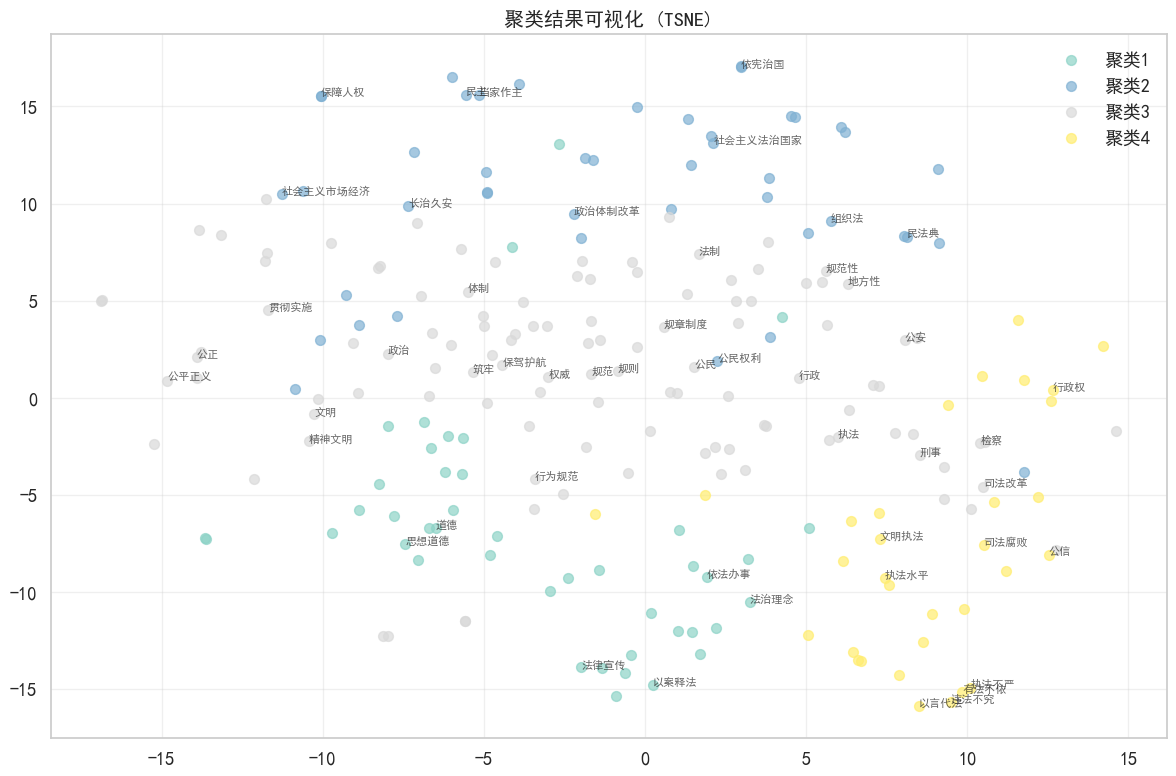

已保存聚类结果到: topic_word/cluster_results_4.txt
轮廓系数 (Silhouette Score): 0.052
Calinski-Harabasz指数: 11.085


(0.052169308, 11.085016242087953)

In [13]:
# 3. 执行4聚类分析
print("\n=== 执行4聚类分析 ===")
clusters_4, word_vectors_4, cluster_labels_4, valid_words_4 = cluster_similar_words(
    models, similar_words_by_period, n_clusters=4, 
    exclude_words_path="exclude_words.txt", top_n=150
)
# 可视化
visualize_clusters(word_vectors_4, cluster_labels_4, valid_words_4, method='tsne')

# 保存聚类结果
save_cluster_results(clusters_4, topic_word_dir / "cluster_results_4.txt")

# 分析聚类质量
analyze_cluster_quality(word_vectors_4, cluster_labels_4)


# print("\n=== 执行3聚类分析 ===")
# all_results_cluster_3= cluster_similar_words(
#     models, similar_words_by_period, n_clusters=3, 
#     exclude_words_path="exclude_words.txt", top_n=150
# )